In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
normal_train_data = pd.read_csv('normal_train_data.csv')
normal_test_data = pd.read_csv('normal_test_data.csv')
anomaly_train_data = pd.read_csv('anomaly_train_data.csv')
anomaly_test_data = pd.read_csv('anomaly_test_data.csv')

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform both training and testing data
normal_train_data_scaled = scaler.fit_transform(normal_train_data)
normal_test_data_scaled = scaler.transform(normal_test_data)
anomaly_train_data_scaled = scaler.transform(anomaly_train_data)
anomaly_test_data_scaled = scaler.transform(anomaly_test_data)

# Convert scaled arrays back to DataFrames
normal_train_data_scaled = pd.DataFrame(normal_train_data_scaled, columns=normal_train_data.columns)
normal_test_data_scaled = pd.DataFrame(normal_test_data_scaled, columns=normal_test_data.columns)
anomaly_train_data_scaled = pd.DataFrame(anomaly_train_data_scaled, columns=anomaly_train_data.columns)
anomaly_test_data_scaled = pd.DataFrame(anomaly_test_data_scaled, columns=anomaly_test_data.columns)

# Save the scaled data to new CSV files
normal_train_data_scaled.to_csv('normal_train_data_scaled.csv', index=False)
normal_test_data_scaled.to_csv('normal_test_data_scaled.csv', index=False)
anomaly_train_data_scaled.to_csv('anomaly_train_data_scaled.csv', index=False)
anomaly_test_data_scaled.to_csv('anomaly_test_data_scaled.csv', index=False)

print("Data normalization using MinMaxScaler completed and saved successfully.")



Data normalization using MinMaxScaler completed and saved successfully.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='sigmoid'))

In [3]:
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(2,activation="relu")])

        self.decoder = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')

model.compile(optimizer='adam', loss='mae')

2024-04-18 01:02:00.851690: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-18 01:02:00.851747: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-18 01:02:00.851767: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-18 01:02:00.851857: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-18 01:02:00.851904: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
history = model.fit(anomaly_train_data_scaled,anomaly_train_data_scaled,
                    epochs=50,
                    batch_size=128,
                    validation_data= (anomaly_test_data_scaled,anomaly_test_data_scaled),
                    shuffle=True,
                    callbacks=[early_stopping])

Epoch 1/50


2024-04-18 01:03:15.406122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - loss: 0.4165 - val_loss: 0.4078
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4133 - val_loss: 0.4018
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4043 - val_loss: 0.3956
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3966 - val_loss: 0.3892
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3960 - val_loss: 0.3827
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3868 - val_loss: 0.3759
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3799 - val_loss: 0.3691
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3737 - val_loss: 0.3620
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3675 - val_loss: 0.3548
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3588 - val_loss: 0.3475
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3503 - val_loss: 0.3401
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3476 - val_loss: 0.3326
Epoch 13/50

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(array([3., 5., 2., 2., 3., 3., 5., 3., 5., 3., 4., 8., 7., 3., 3., 6., 4.,
        2., 3., 3., 4., 0., 3., 2., 2., 0., 1., 1., 1., 0., 1., 0., 2., 0.,
        1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([0.0534199 , 0.05909998, 0.06478007, 0.07046015, 0.07614024,
        0.08182032, 0.08750041, 0.0931805 , 0.09886058, 0.10454067,
        0.11022075, 0.11590084, 0.12158092, 0.12726101, 0.13294109,
        0.13862118, 0.14430126, 0.14998135, 0.15566144, 0.16134152,
        0.16702161, 0.17270169, 0.17838178, 0.18406186, 0.18974195,
        0.19542203, 0.20110212, 0.20678221, 0.21246229, 0.21814238,
        0.22382246, 0.22950255, 0.23518263, 0.24086272, 0.2465428 ,
        0.25222289, 0.25790297, 0.26358306, 0.26926315, 0.27494323,
        0.28062332, 0.2863034 , 0.29198349, 0.29766357, 0.30334366,
        0.30902374, 0.31470383, 0.32038391, 0.326064  , 0.33174409,
        0.33742417]),
 <BarContainer object of 50 artists>)

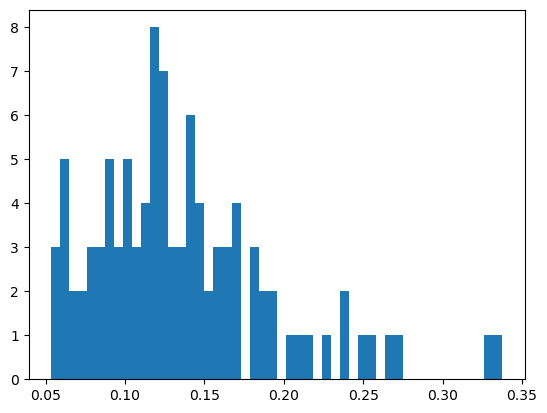

In [11]:
reconstructions = model.predict(anomaly_test_data_scaled)
train_loss = tf.keras.losses.mae(reconstructions, anomaly_test_data_scaled)

plt.hist(train_loss, bins=50)

In [12]:
np.mean(train_loss)

0.13629382075792448

In [13]:
np.std(train_loss)

0.0571469268668664

In [14]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)

In [15]:
threshold

0.2505876744916573

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(array([ 1.,  1.,  0.,  4.,  2.,  5.,  4.,  7.,  5.,  4.,  2., 10.,  2.,
         9.,  4.,  9., 12., 12., 10.,  9.,  7., 11., 13., 10., 14., 14.,
        14., 10.,  8.,  9.,  6.,  8., 13.,  4.,  7.,  5.,  7.,  1.,  5.,
         3.,  4.,  4.,  2.,  1.,  2.,  1.,  2.,  1.,  1.,  1.]),
 array([0.07606694, 0.08498426, 0.09390159, 0.10281892, 0.11173625,
        0.12065358, 0.12957091, 0.13848824, 0.14740557, 0.15632289,
        0.16524022, 0.17415755, 0.18307488, 0.19199221, 0.20090954,
        0.20982687, 0.2187442 , 0.22766152, 0.23657885, 0.24549618,
        0.25441351, 0.26333084, 0.27224817, 0.2811655 , 0.29008283,
        0.29900015, 0.30791748, 0.31683481, 0.32575214, 0.33466947,
        0.3435868 , 0.35250413, 0.36142146, 0.37033878, 0.37925611,
        0.38817344, 0.39709077, 0.4060081 , 0.41492543, 0.42384276,
        0.43276009, 0.44167742, 0.45059474, 0.45951207, 0.4684294 ,
        0.47734673, 0.48626406, 0.49518139, 0.50409872, 0.51301605,
        0.52193337]),
 <BarContainer

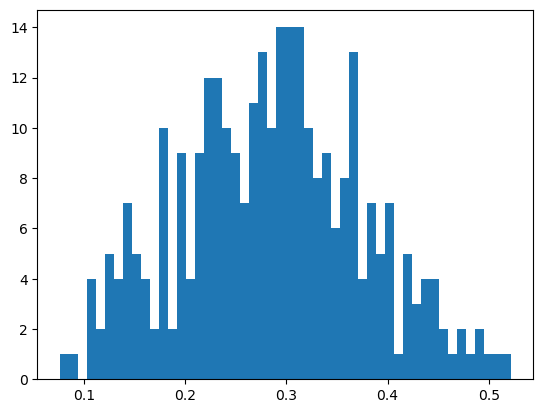

In [16]:
reconstructions_a = model.predict(normal_test_data_scaled)
train_loss_a = tf.keras.losses.mae(reconstructions_a, normal_test_data_scaled)

plt.hist(train_loss_a, bins=50)

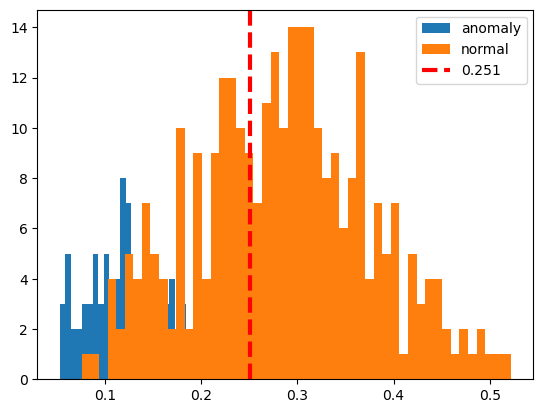

In [17]:
plt.hist(train_loss, bins=50, label='anomaly')
plt.hist(train_loss_a, bins=50, label='normal')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [18]:
np.mean(train_loss_a)

0.28544528531860747

In [19]:
np.std(train_loss_a)

0.09057457053038936

In [20]:
tf.math.less(train_loss, threshold)

<tf.Tensor: shape=(100,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])>

In [21]:
preds = tf.math.less(train_loss, threshold)

In [22]:
preds.shape

TensorShape([100])